In [1]:
from IPython.display import display
import matplotlib.pyplot as plt

In [35]:
HARdata = '../data/DataSet_HAR.csv'
Accuracy_data = 'Accuracy.csv'
Accuracy_data2 = 'Accuracy_Features2.csv'
import pandas as pd
import numpy as np
HARdf = pd.read_csv(HARdata)
Acc_DF = pd.read_csv(Accuracy_data,sep=',')
Acc_DF2 = pd.read_csv(Accuracy_data2,sep=',')

In [27]:
Corr_DF = HARdf.corr()

In [28]:
Corr_DF1= Corr_DF

In [29]:
for column in Corr_DF.columns:
    Corr_DF1 = Corr_DF1[(Corr_DF1[column] <= 0.5) | (Corr_DF1[column] >= 0.9)]
#Corr_DF1

In [30]:
Corr_DF1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656,0.020345
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233,-0.001577
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406,0.001981
"tBodyAcc-arCoeff()-X,4",0.046855,-0.039446,-0.009019,0.327079,0.265240,0.224454,0.329997,0.259929,0.220296,0.317157,...,-0.022378,-0.028070,-0.037758,-0.000791,0.008505,-0.008462,-0.167063,0.142512,0.158423,0.037991
"tBodyAcc-arCoeff()-Y,4",0.057837,-0.009751,0.001552,0.034013,0.002960,-0.006461,0.033148,0.004553,-0.007246,0.033236,...,-0.038340,-0.041009,-0.049031,0.006263,-0.013853,0.004462,0.064731,-0.064300,-0.049670,0.019753
"tBodyAcc-arCoeff()-Z,4",0.009007,-0.017012,-0.004510,0.148146,0.137727,0.193922,0.145271,0.140892,0.192466,0.149863,...,-0.042463,-0.040219,-0.024525,0.007647,-0.008604,-0.009667,-0.009428,0.039878,0.099348,0.099731
"tBodyAcc-correlation()-X,Y",0.034608,-0.005566,0.025463,-0.410736,-0.376707,-0.344085,-0.406731,-0.372348,-0.339657,-0.412986,...,-0.004120,0.007171,0.010222,0.003394,-0.034996,0.032097,0.240627,-0.164058,-0.228322,0.016820
"tBodyAcc-correlation()-X,Z",0.087356,0.013731,-0.023700,-0.017388,-0.018077,-0.098371,-0.012627,-0.018841,-0.088952,-0.025884,...,-0.052959,-0.035930,-0.006743,-0.004738,-0.030923,-0.001643,-0.156429,0.093333,0.188336,-0.030294
tGravityAcc-entropy()-Y,-0.133973,0.052441,0.035117,-0.226908,-0.237842,-0.177702,-0.223737,-0.233665,-0.174021,-0.253484,...,0.036058,0.028741,0.015188,0.014639,-0.006645,0.019178,0.273873,-0.396194,-0.325935,-0.059289
tGravityAcc-entropy()-Z,-0.077865,0.017214,0.017460,0.011957,0.013446,-0.048842,0.009260,0.015570,-0.035370,-0.000163,...,0.072149,0.048641,0.004929,0.004145,-0.003794,0.013414,0.003955,-0.085671,-0.331091,-0.026135


In [31]:
features_corr=Corr_DF1.index.tolist()

In [32]:
features_corr

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-correlation()-X,Y',
 'tGravityAcc-correlation()-X,Z',
 'tBodyAccJerk-mean()-X',
 'tBodyAccJerk-mean()-Y',
 'tBodyAccJerk-mean()-Z',
 'tBodyAccJerk-arCoeff()-Y,4',
 'tBodyAccJerk-arCoeff()-Z,4',
 'tBodyAccJerk-correlation()-X,Y',
 'tBodyAccJerk-correlation()-X,Z',
 'tBodyAccJerk-correlation()-Y,Z',
 'tBodyGyro-mean()-Z',
 'tBodyGyro-arCoeff()-X,4',
 'tBodyGyro-arCoeff()-Y,4',
 'tBodyGyro-arCoeff()-Z,4',
 'tBodyGyro-correlation()-X,Y',
 'tBodyGyro-correlation()-X,Z',
 'tBodyGyro-correlation()-Y,Z',
 'tBodyGyroJerk-mean()-X',
 'tBodyGyroJerk-mean()-Y',
 'tBodyGyroJerk-mean()-Z',
 'tBodyGyroJerk-arCoeff()-X,4',
 'tBodyGyroJerk-arCoeff()-Y,4',
 'tBodyGyroJerk-arCoeff()-Z,4',
 'tBodyGyroJerk-correlation()-X,Y',
 'tBod

In [3]:
def Labels_to_color (df, classif,label_col):
    """
    For a dataframe (df) and its classification (classif) it 
    turns each class label to numerical values and returns the dataframe
    """
    
    ClassList= df[classif].unique()
    id = 0
    color = ['b', 'g', 'r', 'y',  'w', 'c']

    marker = ['o','x','+','^','s','v']
    ClassDict = {}
    for ClassVal in ClassList:
        
        ClassDict[ClassVal]= color[id]
        id = id+1
    print(ClassDict)
    for ClassNum in ClassDict.keys():
        df.ix[df[classif]==ClassNum,label_col] = ClassDict[ClassNum]
        print (ClassDict[ClassNum])
    df=df.drop(classif,axis =1)
    print(df[label_col].unique())
        
    return df

In [4]:
def TSEplot(df,classif):
    from matplotlib.pyplot import figure
    from matplotlib.pyplot import scatter
    from sklearn.manifold import TSNE
    X_tsne = TSNE(learning_rate=50).fit_transform(df.drop(classif,axis=1))
    figure(figsize=(10, 5))

    #scatter(X_tsne[:, 0], X_tsne[:, 1],marker=df[classif],s=80)
    #plt.show()
    return X_tsne

In [5]:
df = Labels_to_color(HARdf,'Activity','marker')

{'WALKING_DOWNSTAIRS': 'w', 'LAYING': 'r', 'SITTING': 'g', 'STANDING': 'b', 'WALKING_UPSTAIRS': 'c', 'WALKING': 'y'}
w
r
g
b
c
y
['b' 'g' 'r' 'y' 'w' 'c']


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [6]:
FittedTSNE = TSEplot(df.drop('subject',axis=1),'marker')

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


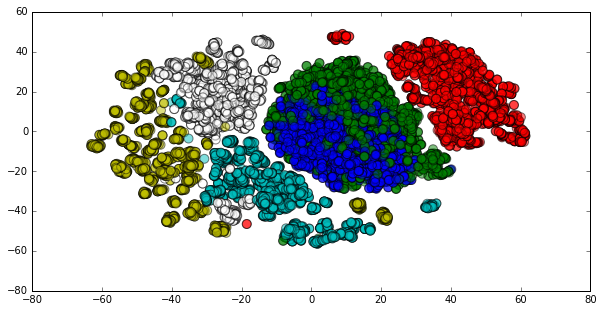

In [21]:
from matplotlib.lines import Line2D
X_tsne = FittedTSNE
plt.figure(figsize=(10, 5))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],color=df['marker'],s=80,alpha = 0.5,edgecolors ='black')
# legend_element = [Line2D([], [], marker='^', color='blue', linestyle ='None', label='S',
#                          markersize=50),
#                  Line2D([], [], marker='o', color='red', linestyle ='None', label='Laying',
#                          markersize=50)]
legend_ = [Line2D([], [], marker='o', markerfacecolor='red', linestyle ='None', label='Laying',
                         markersize=50)]
#plt.legend(legend_)#element)
plt.legend()
plt.show()

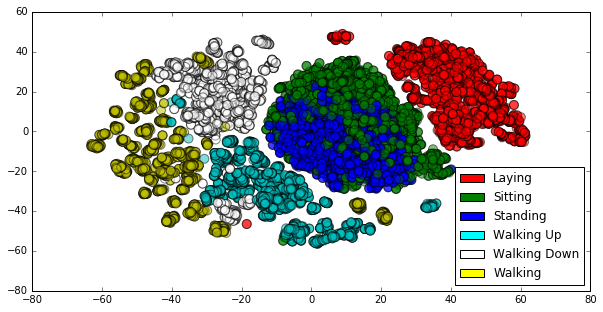

In [61]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
X_tsne = FittedTSNE
plt.figure(figsize=(10, 5))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],color=df['marker'],s=80,alpha = 0.5,edgecolors ='black')
patch = mpatches.Ellipse([1, 1], width =1, height =1, facecolor='red',
                                   edgecolor='black', lw=3,label='Color Patch')

r = mpatches.Ellipse((0.1, 0.5), 0.5,0.4, facecolor="red",linewidth=1)
plt.gca().add_patch(r)

g = mpatches.Ellipse((0.1, 0.5), 0.5,0.4, facecolor="green",linewidth=1)
plt.gca().add_patch(g)

b = mpatches.Ellipse((0.1, 0.5), 0.5,0.4, facecolor="blue",linewidth=1)
plt.gca().add_patch(b)

c = mpatches.Ellipse((0.1, 0.5), 0.5,0.4, facecolor="cyan",linewidth=1)
plt.gca().add_patch(c)

w = mpatches.Ellipse((0.1, 0.5), 0.5,0.4, facecolor="white",linewidth=1)
plt.gca().add_patch(w)

y = mpatches.Ellipse((0.1, 0.5), 0.5,0.4, facecolor="yellow",linewidth=1)
plt.gca().add_patch(y)

legend_element = [patch]

plt.legend([r,g,b,c,w,y],['Laying','Sitting','Standing','Walking Up','Walking Down','Walking'],loc=4)
plt.show()

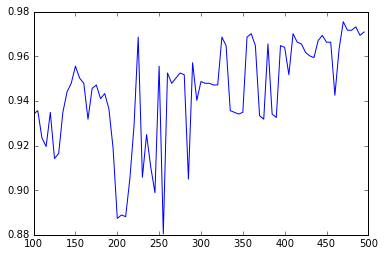

In [25]:
plt.plot(Acc_DF['Number'],Acc_DF['Avg Accuracy'])
plt.show()

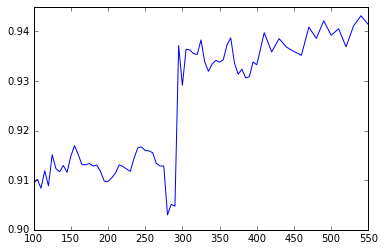

In [36]:
plt.plot(Acc_DF2['Number'],Acc_DF2['Average Accuracy'])
plt.show()

In [ ]:
{'WALKING_DOWNSTAIRS': 'w', 'LAYING': 'r', 'SITTING': 'g', 'STANDING': 'b', 'WALKING_UPSTAIRS': 'c', 'WALKING': 'y'}

In [67]:
Total = HARdf.shape[0]
WD = HARdf[HARdf['Activity']=='WALKING_DOWNSTAIRS'].shape[0]
print('Walk down ',WD/Total)
WU = HARdf[HARdf['Activity']=='WALKING_UPSTAIRS'].shape[0]
print('Walk up ',WU/Total)
SIT = HARdf[HARdf['Activity']=='SITTING'].shape[0]
print('Sitting ',SIT/Total)
STAND = HARdf[HARdf['Activity']=='STANDING'].shape[0]
print('Stand ',STAND/Total)
WALK = HARdf[HARdf['Activity']=='WALKING'].shape[0]
print('Walking',WALK/Total)
LAY = HARdf[HARdf['Activity']=='LAYING'].shape[0]
print('Laying ',LAY/Total)

Walk down  0.13651810855422858
Walk up  0.14991746771531217
Sitting  0.17254102340033012
Stand  0.18506651131177784
Walking 0.16720069909699972
Laying  0.1887561899213516
